<a href="https://colab.research.google.com/github/raunak233456/Machine-Learning-Stock-Price-Prediction-/blob/main/Raunak_StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Raunak kumari

Machine Learning

Stock Price Analysis using linear regression and SVM technique

> Add blockquote




In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt  #visulaization lib
import seaborn as sns #visualization libraries

%matplotlib inline



In [11]:
stocks = input("Enter the code of the stock")
data= yf.download(stocks,"2015-01-01","2024-03-03",auto_adjust= True)
data.head()

Enter the code of the stockAIZ


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,56.572427,56.820119,55.713773,55.953201,452300
2015-01-05,55.854119,55.944939,54.483564,54.698231,656400
2015-01-06,54.681735,55.185366,53.798307,53.938663,686000
2015-01-07,54.244156,54.615695,53.831339,54.153336,576600
2015-01-08,54.656965,55.193628,54.566145,54.962452,759400


In [12]:
data.shape

(2306, 5)

In [13]:
data.describe()

,Open,High,Low,Close,Volume
count,2306.000000,2306.000000,2306.000000,2306.000000,2.306000e+03
mean,106.649821,107.717934,105.612286,106.667317,4.926098e+05
std,34.409021,34.734553,34.068274,34.399286,2.854233e+05
min,49.552515,50.191092,49.535920,49.643734,8.670000e+04
25%,80.604804,81.571187,79.884420,80.732416,3.247000e+05
50%,96.348414,97.242082,95.105572,96.302845,4.256500e+05
75%,130.216095,131.517133,129.032341,130.495678,5.735750e+05
max,186.735359,186.850860,183.087271,185.888290,6.017000e+06


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2306 entries, 2015-01-02 to 2024-03-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2306 non-null   float64
 1   High    2306 non-null   float64
 2   Low     2306 non-null   float64
 3   Close   2306 non-null   float64
 4   Volume  2306 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 108.1 KB


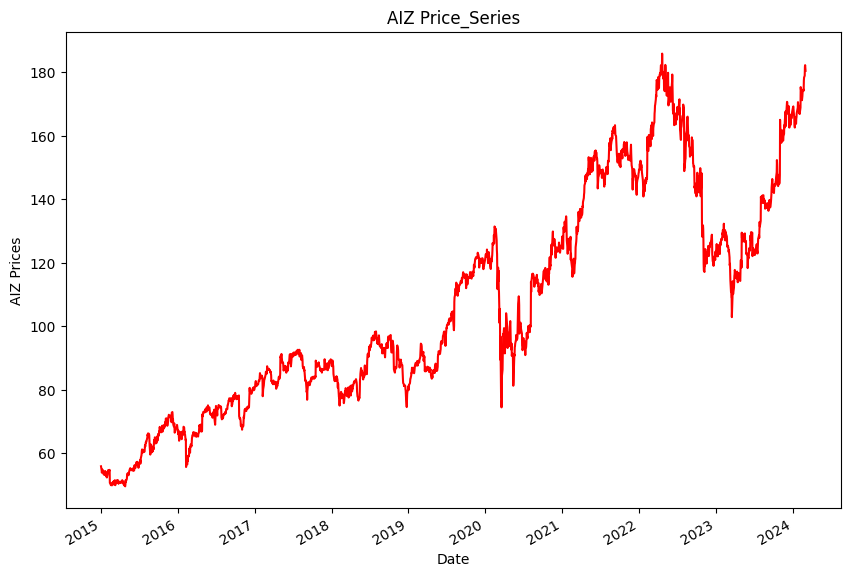

In [15]:
data.Close.plot(figsize =(10,7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price_Series".format(stocks))
plt.show()

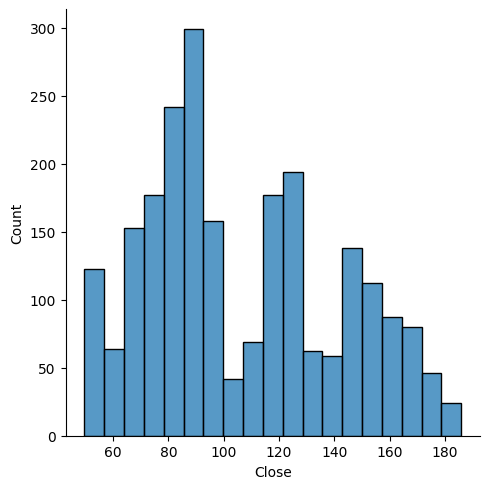

In [16]:
sns.displot(data["Close"])

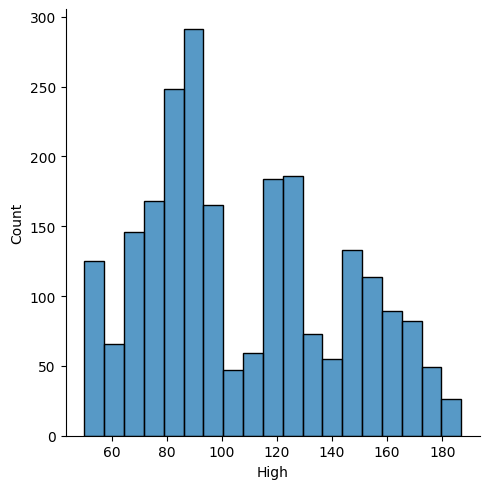

In [18]:
sns.displot(data["High"])

In [19]:
x = data.drop("Close", axis=1)
y = data["Close"]  # target variable

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=0.2, random_state =0 ) #data will not change random_state


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1844, 4)
(462, 4)
(1844,)
(462,)


In [21]:
!pip install scikit-learn

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

lr = LinearRegression()
lr.fit(x_train, y_train)

pred1 = lr.predict(x_test)

In [27]:
pred1

array([ 57.12727801, 179.92627898, 115.22734551, 141.45256069,
       152.39237247,  92.69140297,  76.47269579, 109.72600453,
       147.08276751,  83.80341962, 100.62113724,  84.75500187,
       130.2324333 ,  78.04102283, 160.96976666, 170.99308592,
        63.89156233,  82.76648028, 141.68220175,  81.04547118,
        85.90364268,  78.27740932,  90.06784394, 120.13516051,
        82.375245  , 116.11767132,  71.84305379,  98.04509434,
        50.63468625,  88.32499885, 156.5159682 , 165.08024891,
        91.09025707, 174.58881214,  84.32279782,  87.35151416,
        65.89104389,  86.68469486, 179.8659596 ,  74.74637668,
        94.88301488,  69.23066019,  67.23145295,  86.94854507,
        65.60028095,  67.45105379, 145.82724524,  79.07163848,
        82.30539381,  59.62553657, 169.72041541,  51.01376497,
        86.45595686, 148.10444334,  50.8696365 ,  81.69059339,
        80.64871019, 120.99862792,  82.46025852, 116.09930163,
        90.12075633, 168.02953434,  51.63518224, 115.26

In [31]:
#MSE
#RMSE
#r2 Square

from sklearn.metrics import mean_squared_error, r2_score


def calculate_metrics(y_test,y_pred):

    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2_scor =r2_score(y_test ,y_pred)   #y_test = ground truth and y-pred = model predicted value

    print(mse)
    print(rmse)
    print(r2_scor)

calculate_metrics(y_test, pred1)

0.42542953272397427
0.6522495938856339
0.9996532228539028


In [33]:
from sklearn.linear_model import Lasso,Ridge


la = Lasso().fit(x_train, y_train)
ri = Ridge().fit(x_train, y_train)

la_p = la.predict(x_test)
ri_p = ri.predict(x_test)


calculate_metrics(y_test, la_p)

0.815017855920434
0.9027833936888926
0.9993356606809013


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.645e+02, tolerance: 2.161e+02
  model = cd_fast.enet_coordinate_descent(


In [35]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

# Corrected the typo in the 'kernel' parameter
params_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']  # Changed 'kernal' to 'kernel'
}

grid = GridSearchCV(SVR(), params_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.044 total time=   0.2s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.091 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.073 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.106 total time=   0.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.148 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.044 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.091 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.073 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.106 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.148 total time=   0.2s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.044 total time=   0.2s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [36]:
svr = SVR(C =10, gamma= 0.01, kernel = 'rbf')
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test)

In [41]:
import joblib

joblib.dump(ri,'model.pkl')

ridge_from_model =model= joblib.load("model.pkl")
